In [65]:
import pickle
import numpy as np
import json
from collections import Counter
import matplotlib.pyplot as plt

In [66]:
const_lambda_array = np.zeros([6,])
for i in range(50):
    with open(f'../SV_result/mnist_cnum6_dist2_skew0.8_seed0/const_lambda/Round{i+1}const_lambda.npy', 'rb') as f:
        const_lambda = pickle.load(f)
        const_lambda_array += const_lambda / pow(i+1, 2)

In [67]:
const_lambda_array = const_lambda_array / const_lambda_array.sum()

In [68]:
const_lambda_array

array([0.19278285, 0.19330156, 0.0998004 , 0.2043566 , 0.12075963,
       0.18899896])

In [69]:
exact_array = np.zeros([6,])
for i in range(50):
    with open(f'../SV_result/mnist_cnum6_dist2_skew0.8_seed0/exact/Round{i+1}exact.npy', 'rb') as f:
        exact = pickle.load(f)
        exact_array += exact / pow(i + 1, 2)

In [70]:
exact_array = exact_array / exact_array.sum()

In [71]:
exact_array

array([0.2144848 , 0.19642277, 0.07112041, 0.21494493, 0.10511905,
       0.19790804])

In [72]:
# for client_name in fdata1['client_names']:
#     print(sum(list(Counter(fdata1[client_name]['dtrain']['y']).values())))

In [73]:
optimal_array = np.zeros([6,])
for i in range(50):
    with open(f'../SV_result/mnist_cnum6_dist2_skew0.8_seed0/optimal_lambda/optimal_lambda-300.npy', 'rb') as f:
        optimal = pickle.load(f)

In [74]:
for i in range(50):
    optimal[i] = optimal[i] / pow(i + 1, 2)

In [75]:
optimal = optimal.sum(axis=0)
optimal

array([0.2834195 , 0.27511007, 0.1418812 , 0.29681426, 0.17364784,
       0.27769779])

In [76]:
optimal = optimal / optimal.sum()

In [77]:
tmp = np.array([0.40500032, 0.39349033, 0.37641735, 0.25248232, 0.38926632, 0.32802285])
# tmp = np.array([0.14449378, 0.14986054, 0.15782116, 0.21560837, 0.15183007, 0.18038608])

In [78]:
with open('../SV_result/mnist_cnum6_dist2_skew0.8_seed0/central/central.npy', 'rb') as f:
    central = pickle.load(f)
central = central - central.min()
central = central / central.sum()
central

array([0.30973931, 0.39629001, 0.1854641 , 0.01015886, 0.        ,
       0.09834771])

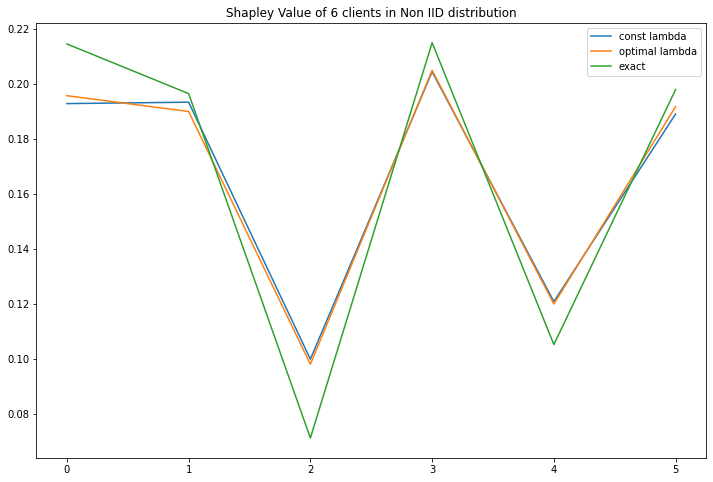

In [84]:
plt.figure(figsize=(12, 8))
plt.plot(const_lambda_array, label='const lambda')
plt.plot(optimal, label='optimal lambda')
plt.plot(exact_array, label='exact')
# plt.plot(tmp, label='wd')
# plt.plot(central, label='central')
plt.title('Shapley Value of 6 clients in Non IID distribution')
plt.legend()
plt.show()

In [80]:
for client_name in fdata1['client_names']:
    print(list((Counter(fdata1[client_name]['dtrain']['y']).keys())))
    print(list(Counter(fdata1[client_name]['dtrain']['y']).values()))

NameError: name 'fdata1' is not defined

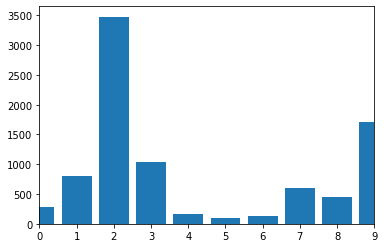

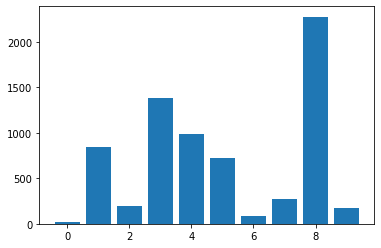

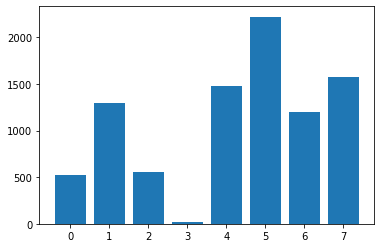

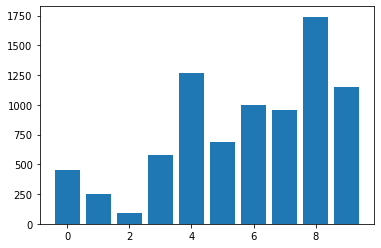

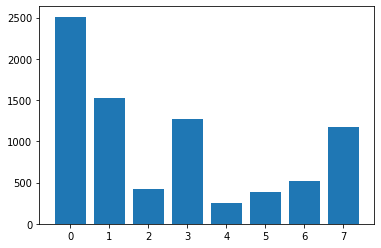

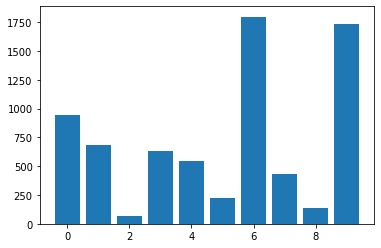

In [ ]:
plt.xlim([0,9])

for client_name in fdata1['client_names']:
    raw_dict = dict(Counter(fdata1[client_name]['dtrain']['y']))
    index_list = []
    value_list = []
    for i in sorted(raw_dict):
        index_list.append(i)
        value_list.append(raw_dict[i])

    plt.bar(index_list, value_list)
    plt.show()
    

In [ ]:
with open('../fedtask/mnist_cnum6_dist2_skew0.8_seed0/data.json', 'r', encoding='utf-8') as f1:
    fdata1 = json.load(f1)

In [ ]:
fdata1.keys()

dict_keys(['store', 'client_names', 'dtest', 'Client0', 'Client1', 'Client2', 'Client3', 'Client4', 'Client5'])

In [ ]:
print(Counter(fdata1['dtest']['y']))
for client in fdata1['client_names']:
    print(client, Counter(fdata1[client]['dtrain']['y']))

Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
Client0 Counter({2: 3478, 9: 1718, 3: 1033, 1: 808, 7: 609, 8: 458, 0: 290, 4: 159, 6: 124, 5: 95})
Client1 Counter({8: 2274, 3: 1384, 4: 983, 1: 838, 5: 725, 7: 273, 2: 196, 9: 169, 6: 86, 0: 21})
Client2 Counter({5: 2220, 7: 1576, 4: 1473, 1: 1292, 6: 1197, 2: 559, 0: 525, 3: 15})
Client3 Counter({8: 1741, 4: 1266, 9: 1147, 6: 996, 7: 957, 5: 688, 3: 581, 0: 450, 1: 249, 2: 94})
Client4 Counter({0: 2511, 1: 1529, 3: 1270, 7: 1174, 6: 513, 2: 427, 5: 382, 4: 253})
Client5 Counter({6: 1798, 9: 1732, 0: 948, 1: 682, 3: 635, 4: 542, 7: 429, 5: 224, 8: 134, 2: 67})


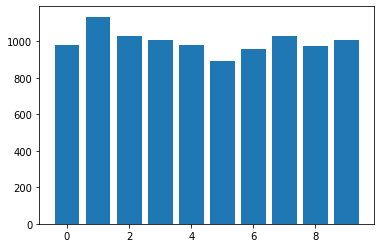

In [ ]:
raw_test_dict = dict(Counter(fdata1['dtest']['y']))
index_list1 = []
value_list1 = []
for i in sorted(raw_test_dict):
    index_list1.append(i)
    value_list1.append(raw_test_dict[i])

plt.bar(index_list1, value_list1)
plt.show()